<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

goal:
    either improve highschool outcomes
    or reduce drug abuse

# [] Step 1: Import the data

In [8]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [9]:
from pprint import pprint

In [10]:
dic = {}
state = []
rate = []
math = []
verb = []
with open('sat_scores.csv', 'r') as csvfile:
    splitter = csv.reader(csvfile, delimiter=',')
    for row in splitter:
        if 'State' not in row:
            state.append(row[0])
            rate.append(row[1])
            math.append(row[3])
            verb.append(row[2])
dic['State'] = state
dic['Rate'] = rate
dic['Math'] = math
dic['Verbal'] = verb
#pprint(dic)

In [11]:
sat = pd.read_csv('sat_scores.csv')
sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [12]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

# [] Step 2: Take a look at what we've got

1. seems to have average scores of verbal and math for each state
2. whats rate? 
3. its the participation rate of students that take the sat in that state
4. after reading a bit about it, states with a lower participation rate have artificially higher scores due to the bias of good students being eager to take the test
 
 http://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate

In [13]:
sat.sort_values('Rate',ascending=False).head(5)
sat.sort_values('Rate',ascending=False).tail(5)

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


In [14]:
sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


# [] Side project 

create a data dictionary, so we won't forget what were looking at when we return from vacation

In [15]:
data_dic = {}

cols = sat.columns
dtypes = sat.dtypes
desc = {'State':'State','Rate':'Participation Rate','Verbal':'Average Verbal Test Score','Math':'Average Math Test Score'}


for col in cols:
    data_dic[col] = list((col,dtypes[col],desc[col]))

data_dic['Shape'] = sat.shape
pprint(data_dic)

{'Math': ['Math', dtype('int64'), 'Average Math Test Score'],
 'Rate': ['Rate', dtype('int64'), 'Participation Rate'],
 'Shape': (52, 4),
 'State': ['State', dtype('O'), 'State'],
 'Verbal': ['Verbal', dtype('int64'), 'Average Verbal Test Score']}


# [] Add a column with regions
1. after reading more about the sat I figured it would be interesting and useful
2. in addition to a string desc, include a numeric

In [16]:
#manually create buckets for states based on wiki
#https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States

regions = {
    'Northeast': ['CT','ME','MA','NH','RI','VT','NJ','NY','PA'],
    'Midwest': ['IL','IN','MI','OH','WI','IA','KS','MN','MO','NE','ND','SD'],
    'South': ['DE','FL','GA','MD','NC','SC','VA','WV','AL','KY','MS','TN','AR','LA','OK','TX','DC'],
    'West': ['AZ','CO','ID','MT','NV','NM','UT','WY','AK','CA','HI','OR','WA']
}

#confirm didn't miss any
total = 0
for region in regions.keys():
    total += len(regions[region])
print(total)

51


In [17]:
#add regions into sat dataframe
for i in range(len(sat)):
    for region in regions.keys():
        if sat.ix[i,'State'] in (regions[region]):
            sat.ix[i,'Region'] = region

sat.head()

,State,Rate,Verbal,Math,Region
0,CT,82,509,510,Northeast
1,NJ,81,499,513,Northeast
2,MA,79,511,515,Northeast
3,NY,77,495,505,Northeast
4,NH,72,520,516,Northeast


In [18]:
#figure out what enumerate does again
R_nums = {}
for i, region in enumerate(regions.keys()):
    print(i,region)
    R_nums[i] = region

(0, 'West')
(1, 'Northeast')
(2, 'Midwest')
(3, 'South')


In [19]:
#add a numeric equivelent for region so i can use it in coloring the seaborn plot
for i in range(len(sat)):
    for j, region in enumerate(regions.keys()):
        if sat.ix[i,'Region'] == region:
            sat.ix[i,'R_num'] = j
sat.sort_values(['R_num','Verbal'])

,State,Rate,Verbal,Math,Region,R_num
21,HI,52,485,515,West,0.0
23,CA,51,498,517,West,0.0
25,NV,33,509,515,West,0.0
22,AK,51,514,510,West,0.0
24,AZ,34,523,525,West,0.0
17,OR,55,526,526,West,0.0
19,WA,53,527,527,West,0.0
26,CO,31,539,542,West,0.0
28,MT,23,539,539,West,0.0
30,ID,17,543,542,West,0.0


# [] Plot a Hist and Pairplot!
## I found overlaying the hists on each other in seaborn was difficult, so I ended up with the matplotlib hist
## found some true inspiration at the seaborn gallery so I added the 'hue' keyword to it
http://seaborn.pydata.org/examples/
## once I realized I could color code based on that, I retraced my steps and added the numeric region tag

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.distplot(sat['Rate'],kde=False,label='Rate',bins=25)

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


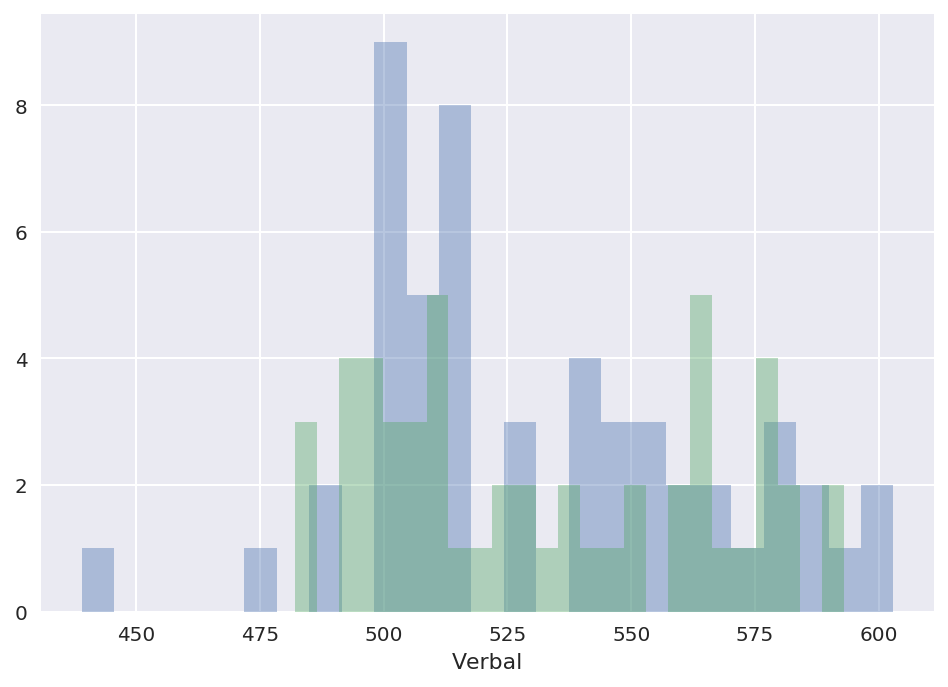

In [21]:
#i don't like how the numbers don't align - each bin is created independently from each columns data
x=25
sns.distplot(sat['Math'],kde=False,label='Math',bins=x)
sns.distplot(sat['Verbal'],kde=False,label='Verbal',bins=x)

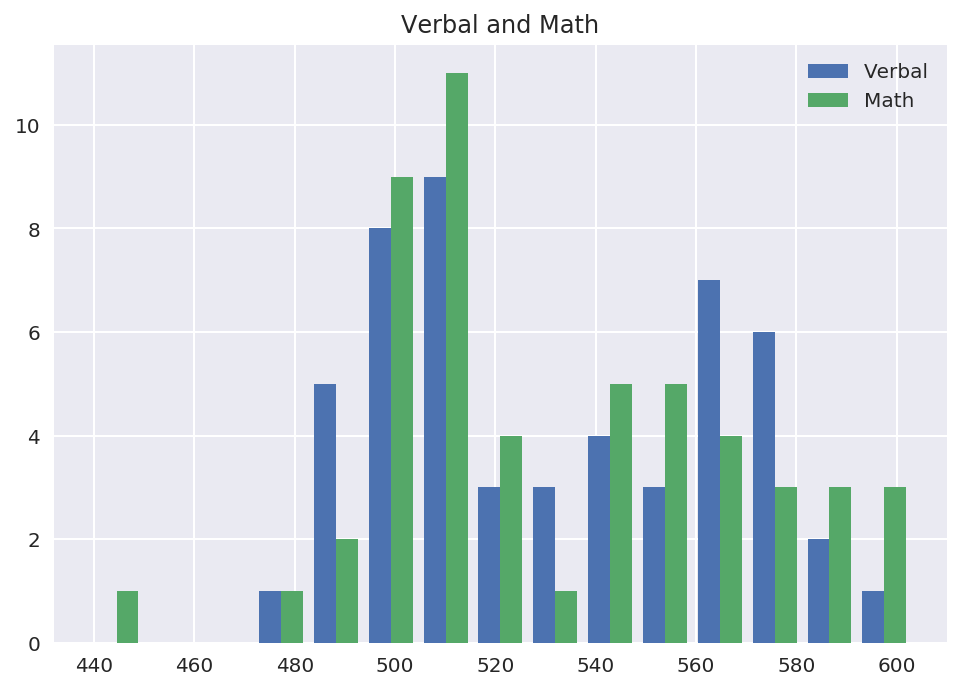

In [22]:
plt.hist([sat['Verbal'],sat['Math']],bins=15)
plt.title('Verbal and Math')
plt.legend(['Verbal','Math'])

# [] Pairplot:
## My expectation was the lower the participation rate of the state the higher the scores
## This is apparent from the graphs on the bottom row where the lighter color indicates a lower participation rate on the lower end of the rate range and higher end of the verbal and math ranges

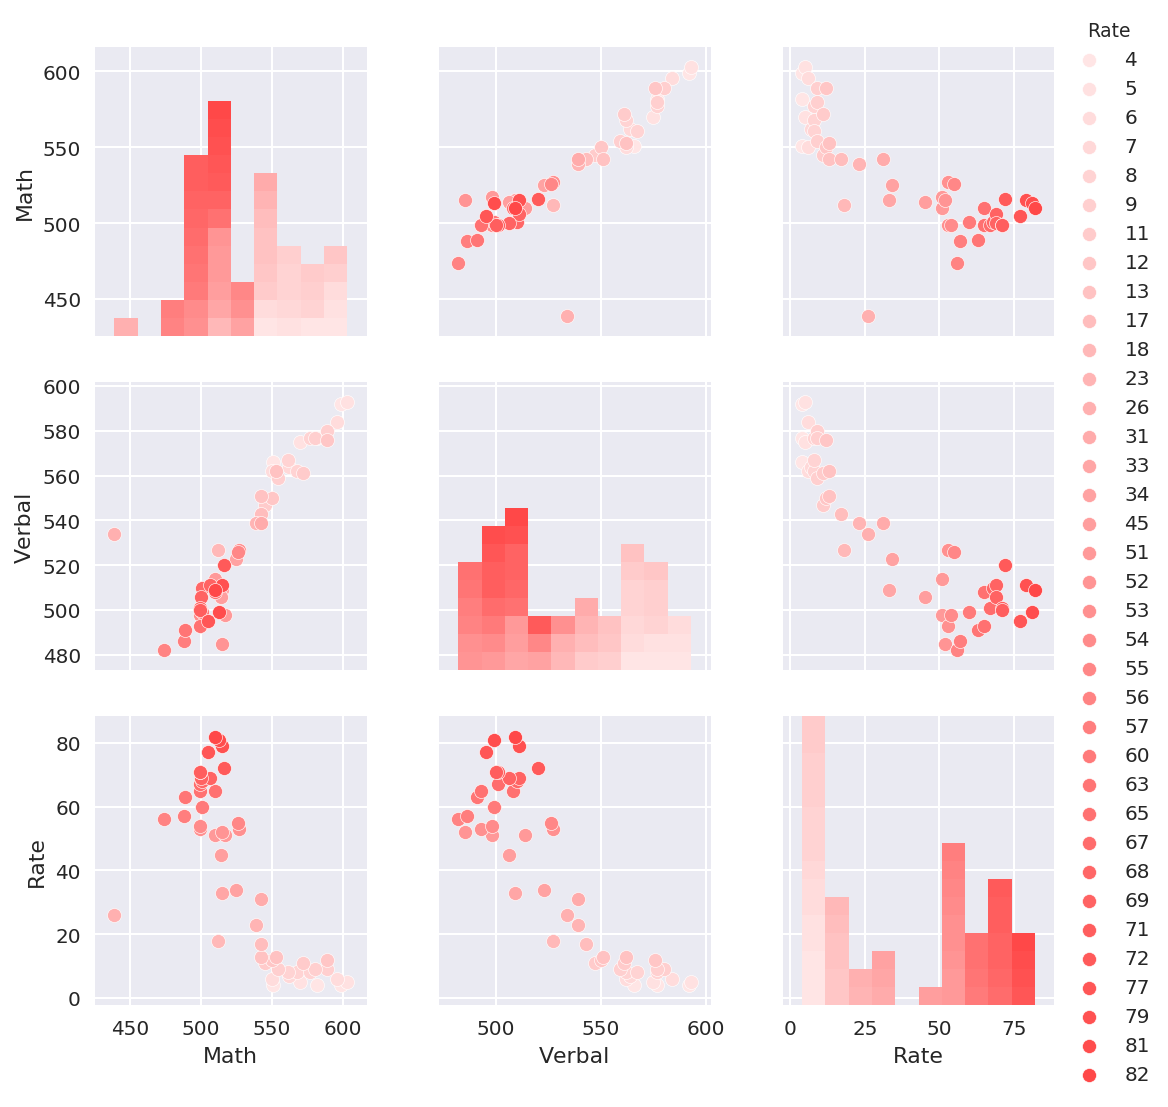

In [23]:
#expectation from what I read is that the lower the participation rate of the state the higher the scores
#this is apparent from the graphs on the bottom row where the lighter color indicates a lower participation rate
#on the lower end of the rate range and higher end of the verbal and math ranges
sns.pairplot(sat[['Math','Verbal','Rate']],hue='Rate',palette=sns.light_palette("red",len(sat['Rate'])))

## The south (green) seems to have two distinct regions within it
### one with a low rate of participants and one with a high rate of participation

## The northeast is well clustered

## The midwest also is clustered well with 2 oddballs
### IN and OH

## The west is the region with the most spead - which makes since with the region including very different states:
### AK HI and CA WA OR as well as AZ NM

In [24]:
sat.head()#.sort_values('Verbal')

,State,Rate,Verbal,Math,Region,R_num
0,CT,82,509,510,Northeast,1.0
1,NJ,81,499,513,Northeast,1.0
2,MA,79,511,515,Northeast,1.0
3,NY,77,495,505,Northeast,1.0
4,NH,72,520,516,Northeast,1.0


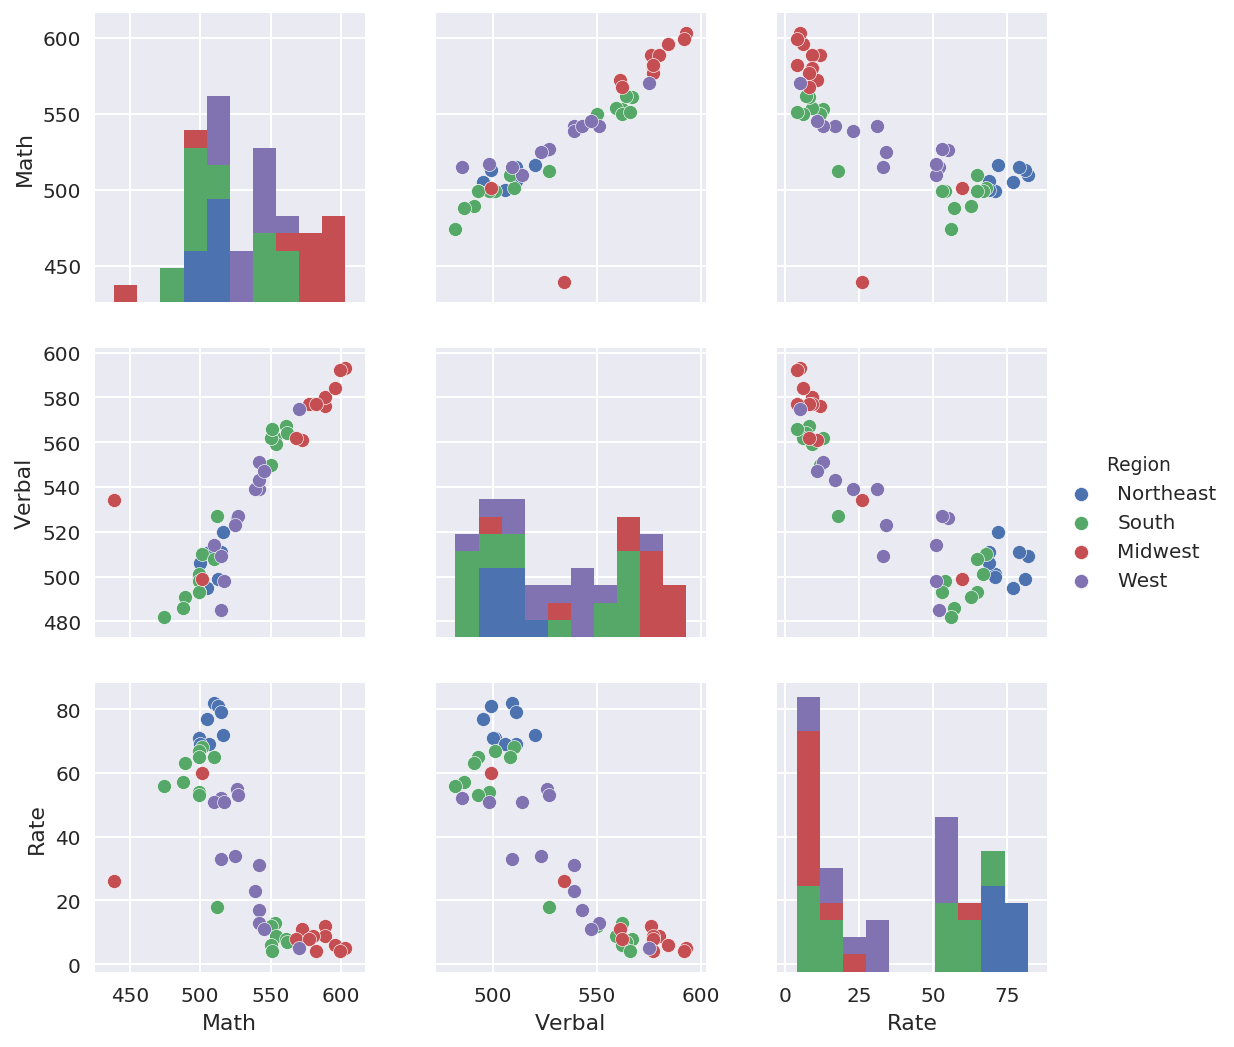

In [25]:
sns.pairplot(sat[['Math','Verbal','Rate','Region']],hue='Region')
#sat.head()

# [] Plot in pandas
## I couldn't get the pandas internal hist to plot stacked, but i found that the stacked hist above had differing bins which didn't align well. I liked the side by side hist that matplotlib produced better

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f28f95c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5f288b5650>]], dtype=object)

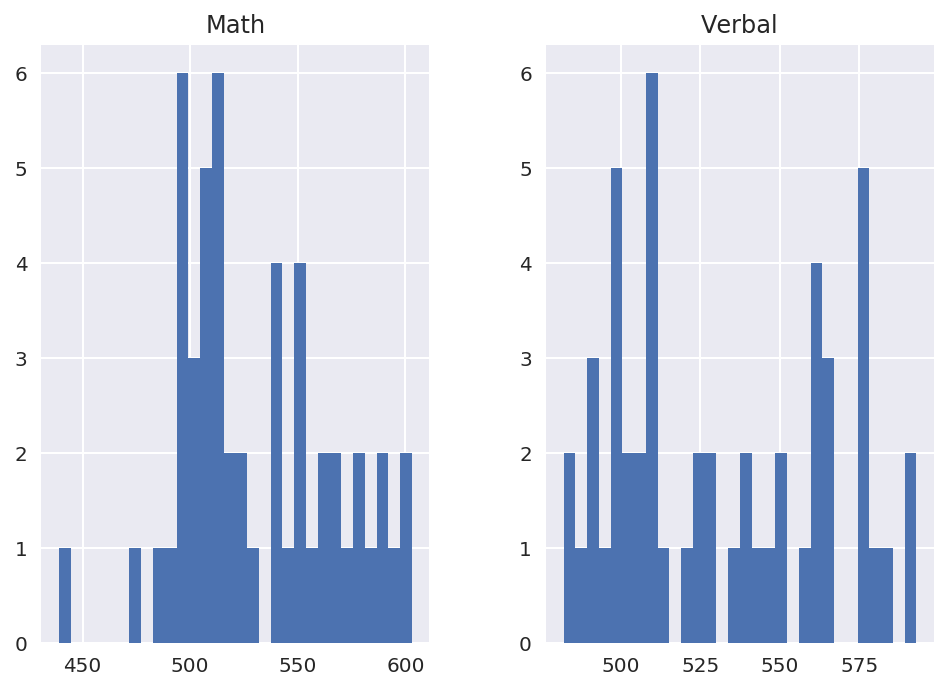

In [26]:
sat.hist(['Verbal','Math'],bins=30,stacked=True)

# [] Boxplots:
## Boxplots have a much more concise way of representing the range of data than histograms. They're much better at conveying the min/max and outliers as well

/opt/conda/envs/python2/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


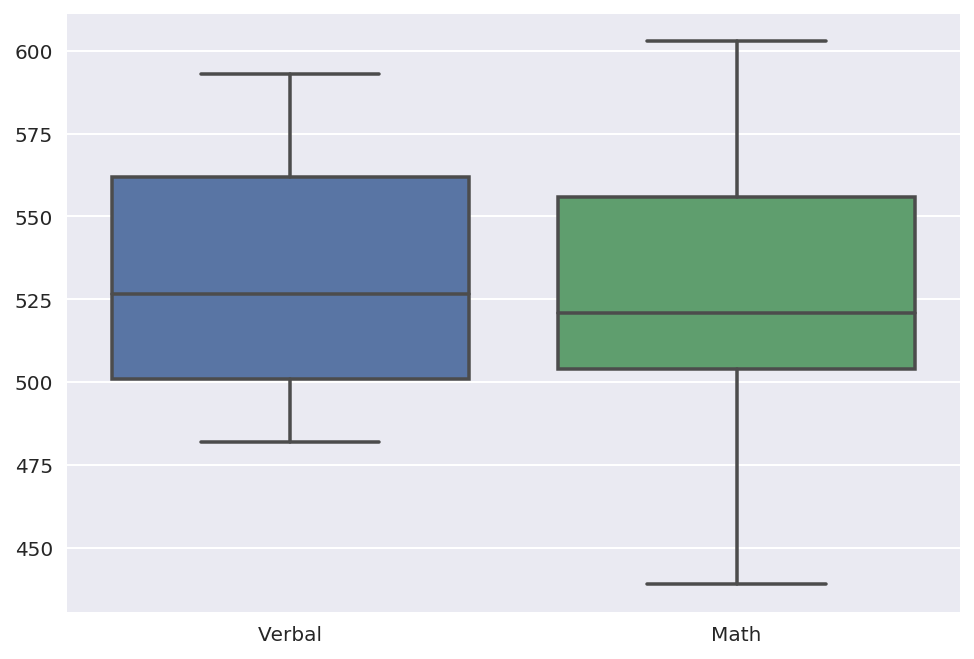

In [27]:
sns.boxplot(sat[['Verbal','Math']])

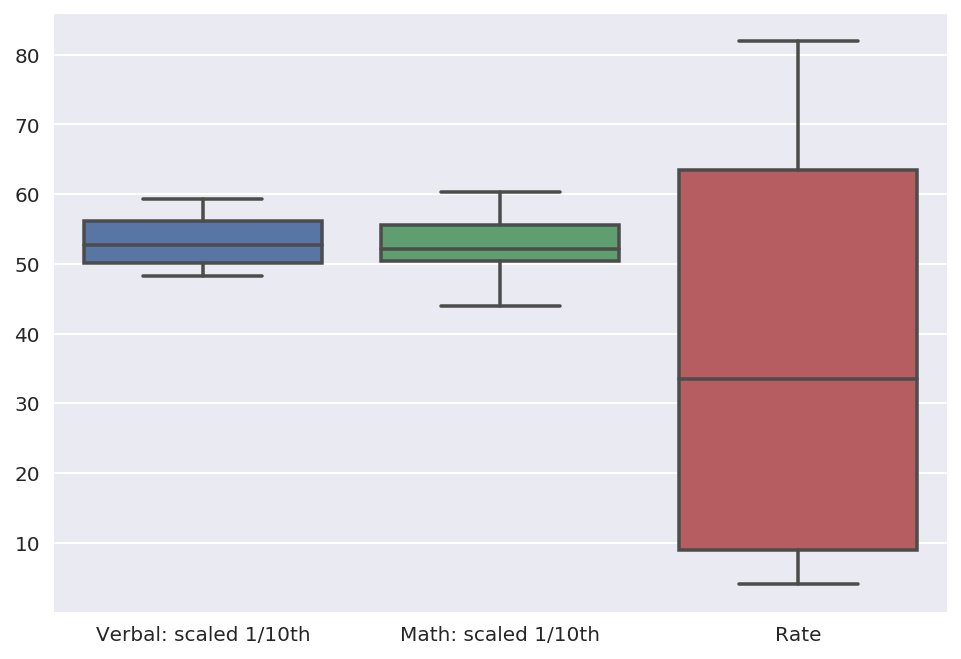

In [28]:
satbox = pd.DataFrame()
satbox['Verbal: scaled 1/10th'] = sat['Verbal'] / 10
satbox['Math: scaled 1/10th'] = sat['Math'] / 10
satbox['Rate'] = sat['Rate']

sns.boxplot(satbox[['Verbal: scaled 1/10th','Math: scaled 1/10th','Rate']])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [29]:
sat[sat['Verbal'] > sat['Verbal'].mean()]['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [30]:
#if 24 states are above the mean it seems like it is fairly normally distributed, however it has a slight
#right skew
print('The mean verbal score is: ' + str(sat['Verbal'].mean()))
sat[sat['Verbal'] > sat['Verbal'].mean()]['State'].count()

The mean verbal score is: 532.019230769


24

In [31]:
#verbal has a bit of a positive right hand skew confirming findings above
sat['Verbal'].skew()

0.26031195123678091

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [32]:
#there are two more states that fall above the 
print('The mean verbal score is: ' + str(sat['Verbal'].median()))
sat[sat['Verbal'] > sat['Verbal'].median()]['State'].count()

The mean verbal score is: 526.5


26

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [33]:
sat['Verbal/Math Diff'] = (sat['Verbal'] - sat['Math'])

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [34]:
#states with the greatest difference between scores
verb_sat = pd.DataFrame()
verb_sat = sat[sat['Verbal/Math Diff'] > 0].sort_values('Verbal/Math Diff',ascending=False).head(10)
verb_sat.head(3)

,State,Rate,Verbal,Math,Region,R_num,Verbal/Math Diff
27,OH,26,534,439,Midwest,2.0,95
29,WV,18,527,512,South,3.0,15
50,MS,4,566,551,South,3.0,15


In [35]:
#states with the greatest difference between scores
math_sat = pd.DataFrame()
math_sat = sat[sat['Verbal/Math Diff'] < 0].sort_values('Verbal/Math Diff').head(10)
math_sat.head(3)

,State,Rate,Verbal,Math,Region,R_num,Verbal/Math Diff
21,HI,52,485,515,West,0.0,-30
23,CA,51,498,517,West,0.0,-19
1,NJ,81,499,513,Northeast,1.0,-14


# [] Corr Matrix
## As we saw on the pairplot, the scores tend to rise together. A state with good math scores tends to have good verbal scors as well. 
## The Math <> Verbal Corr is therefore posative
## Both Math and Verbal have a negative corr against rate which is what we expected after seeing the colored rate pairplot

                      Rate    Verbal      Math     R_num  Verbal/Math Diff
Rate              1.000000 -0.886432 -0.773746 -0.144331         -0.101412
Verbal           -0.886432  1.000000  0.899871  0.100429          0.052600
Math             -0.773746  0.899871  1.000000  0.014354         -0.388219
R_num            -0.144331  0.100429  0.014354  1.000000          0.178632
Verbal/Math Diff -0.101412  0.052600 -0.388219  0.178632          1.000000


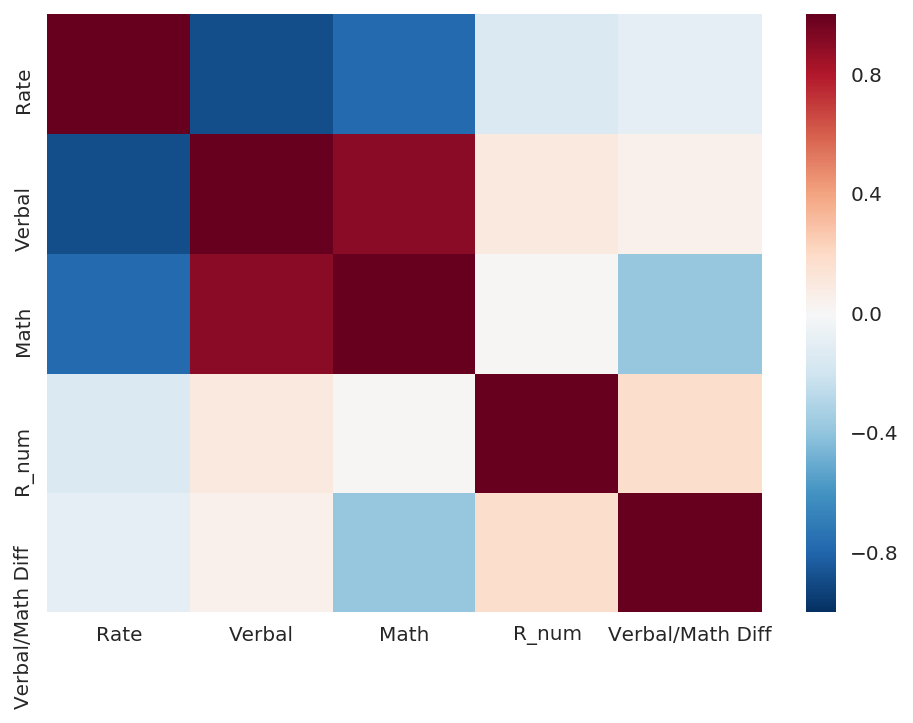

In [36]:
#the correlation matrix 
o_sat_corr = sat[['Verbal','Math','Rate']].corr()
sat_corr = sat.corr()
#sns.heatmap(o_sat_corr)
print(sat_corr)
sns.heatmap(sat_corr)

# [] Take a look at descriptive stats

In [37]:
#count - number of rows in cals
#mean - averge of each row
#std - the standard deviation amount

sat.describe()

,Rate,Verbal,Math,R_num,Verbal/Math Diff
count,52.000000,52.000000,52.000000,51.000000,52.000000
mean,37.153846,532.019231,531.500000,1.647059,0.519231
std,27.301788,33.236225,36.014975,1.197055,15.729939
min,4.000000,482.000000,439.000000,0.000000,-30.000000
25%,9.000000,501.000000,504.000000,0.500000,-6.000000
50%,33.500000,526.500000,521.000000,2.000000,0.000000
75%,63.500000,562.000000,555.750000,3.000000,4.250000
max,82.000000,593.000000,603.000000,3.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

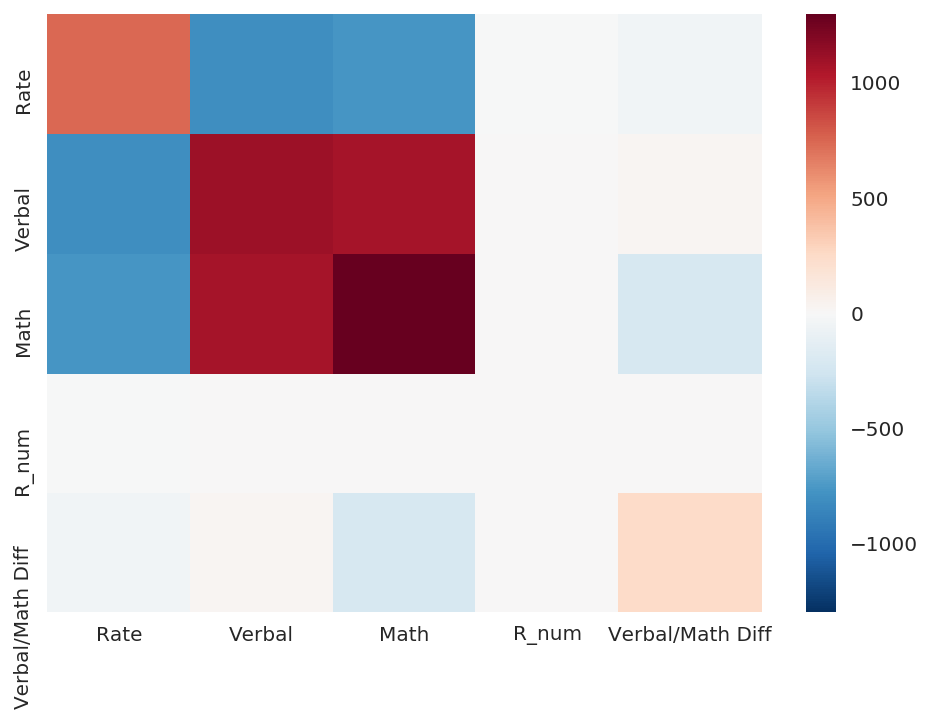

In [38]:
#the covariance matrix 
o_sat_cov = sat[['Verbal','Math','Rate']].cov()
sat_cov = sat.cov()
sns.heatmap(sat_cov)

# [] On to Drug Data!
## First thing I notice is the pairs of columns freq and use per drug
## there are also a number of columns that should be numeric that aren't due to '-' characters we'll need to remove those before we begin analysis
## Column 'n' looks like a count of participants the data is based off of. I don't think it will be useful

In [39]:
import pandas as pd
drug = pd.read_csv('drug-use-by-age.csv')
drug#.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [40]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [41]:
drug.groupby('cocaine-frequency').size()

cocaine-frequency
-       1
1.0     1
15.0    1
36.0    1
4.0     1
5.0     6
5.5     2
6.0     1
7.0     1
8.0     2
dtype: int64

In [42]:
drug['cocaine-frequency'].sort_values().unique()

array(['-', '1.0', '15.0', '36.0', '4.0', '5.0', '5.5', '6.0', '7.0', '8.0'], dtype=object)

In [43]:
#idea of how to resolve this
#drug['cocaine-frequency'] = drug['cocaine-frequency'].str.replace('-','0')
#drug['cocaine-frequency'] = pd.to_numeric(drug['cocaine-frequency'])

In [44]:
drug['heroin-use'].dtype == 'float64'

True

In [45]:
#explore the counts in columns that are 'object' type
cols = drug.columns
for col in cols:
    if drug[col].dtype == 'object':
        print(drug[col].value_counts())

22-23    1
18       1
12       1
15       1
14       1
17       1
16       1
19       1
24-25    1
26-29    1
65+      1
20       1
30-34    1
35-49    1
21       1
50-64    1
13       1
Name: age, dtype: int64
5.0     6
5.5     2
8.0     2
15.0    1
-       1
7.0     1
6.0     1
4.0     1
1.0     1
36.0    1
Name: cocaine-frequency, dtype: int64
-       3
6.0     2
5.0     2
15.0    1
2.0     1
9.5     1
3.0     1
17.0    1
48.0    1
62.0    1
21.0    1
1.0     1
10.0    1
Name: crack-frequency, dtype: int64
120.0    1
-        1
180.0    1
66.0     1
1.0      1
66.5     1
50.0     1
30.0     1
88.0     1
46.0     1
35.5     1
64.0     1
57.5     1
280.0    1
2.0      1
45.0     1
41.0     1
Name: heroin-frequency, dtype: int64
4.0     5
2.0     2
3.0     2
3.5     1
13.5    1
-       1
19.0    1
12.0    1
5.5     1
10.0    1
5.0     1
Name: inhalant-frequency, dtype: int64
13.5    2
12.0    2
17.5    1
3.0     1
20.0    1
7.0     1
41.0    1
6.0     1
-       1
5.0     1
24.5    1
7.

# [] Convert non numerics to numerics
## After looking at all the data, I see that the '-' chars are the only ones that are causing these columns to be 'objects'
## So I'll loop through all the columns looking for columns that are type 'object'
## And then replace the '-' with '0'
## While still in that columns context, I can push the to_numeric function at the same time
## And look! all floats, just what we want

In [46]:
#reassign columns that are 'object' type to numeric by replacing '-' chars with '0'
#confirm that there are no real value '0's in the data
cols = drug.columns
for col in cols:
    if col != 'age':    
        if drug[col].dtype == 'object':
            drug[col] = drug[col].str.replace('-','0')
            drug[col] = pd.to_numeric(drug[col])

In [47]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

# [] Now for some visual investigation
## First a heatmap, since all our data is numeric, it should be telling

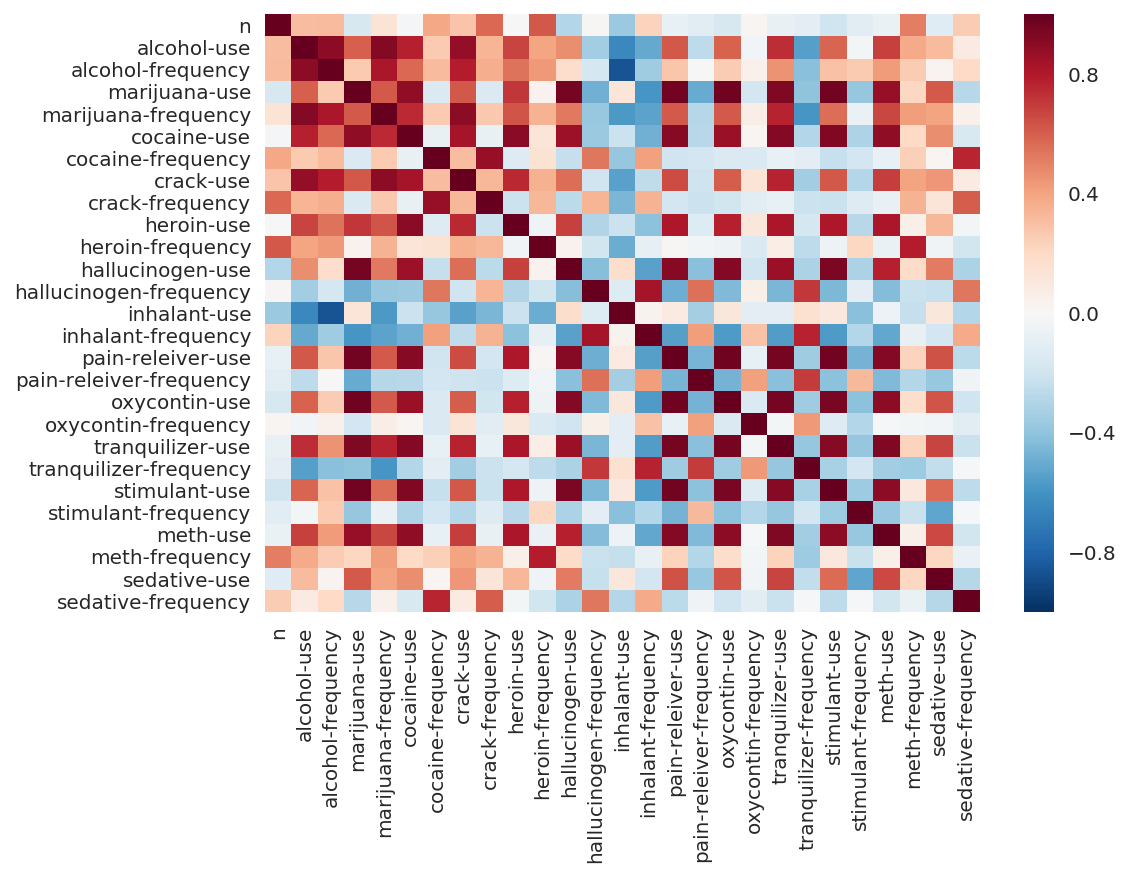

In [48]:
import seaborn as sns
drug_corr = drug.corr()
sns.heatmap(drug_corr)

## But it looks really off with the freq and useage in the same plot.. so lets break them apart
### in addition:
### Drug use and drug frequency are very different values, I think its safe to assume that drug useage relates to other drug useage more than another drug frequency

In [49]:
#Check top corrs for different drugs

#drug_corr['alcohol-use'].abs().sort_values(ascending=False)
#drug_corr['hallucinogen-use'].abs().sort_values(ascending=False)
drug_corr['cocaine-use'].abs().sort_values(ascending=False)

cocaine-use                1.000000
stimulant-use              0.923954
tranquilizer-use           0.920430
pain-releiver-use          0.906638
heroin-use                 0.899944
meth-use                   0.889353
marijuana-use              0.883789
oxycontin-use              0.865626
hallucinogen-use           0.855668
crack-use                  0.835727
alcohol-use                0.773458
marijuana-frequency        0.742598
alcohol-frequency          0.577601
inhalant-frequency         0.483785
sedative-use               0.461914
hallucinogen-frequency     0.368402
stimulant-frequency        0.309286
tranquilizer-frequency     0.294905
pain-releiver-frequency    0.273908
inhalant-use               0.214609
meth-frequency             0.199366
sedative-frequency         0.159997
heroin-frequency           0.128866
cocaine-frequency          0.077848
crack-frequency            0.076876
n                          0.021565
oxycontin-frequency        0.017269
Name: cocaine-use, dtype: fl

In [50]:
#create a drug_use df
drug_use = pd.DataFrame()
cols = drug.columns

drug_use['age'] = drug['age']
drug_use['n'] = drug['n']

for col in cols:
    if 'use' in col:
        #print(col)
        drug_use[col] = drug[col]

drug_use.head()

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


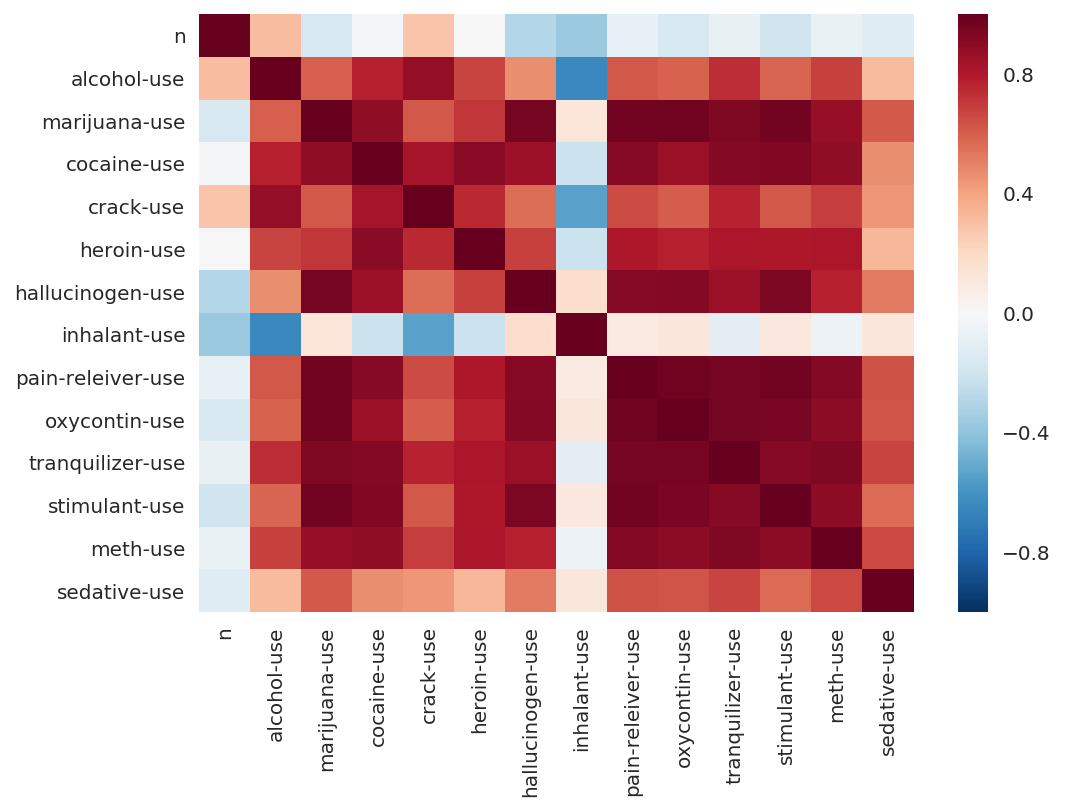

In [51]:
drug_use_corr = drug_use.corr()
sns.heatmap(drug_use_corr)

In [52]:
#create a drug_f df
#how are the drug frequencies correlated?
drug_f = pd.DataFrame()
cols = drug.columns

drug_f['age'] = drug['age']
drug_f['n'] = drug['n']

for col in cols:
    if 'frequency' in col:
        #print(col)
        drug_f[col] = drug[col]

drug_f.head()

,age,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,2798,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
1,13,2757,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,2792,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,2956,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,3058,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


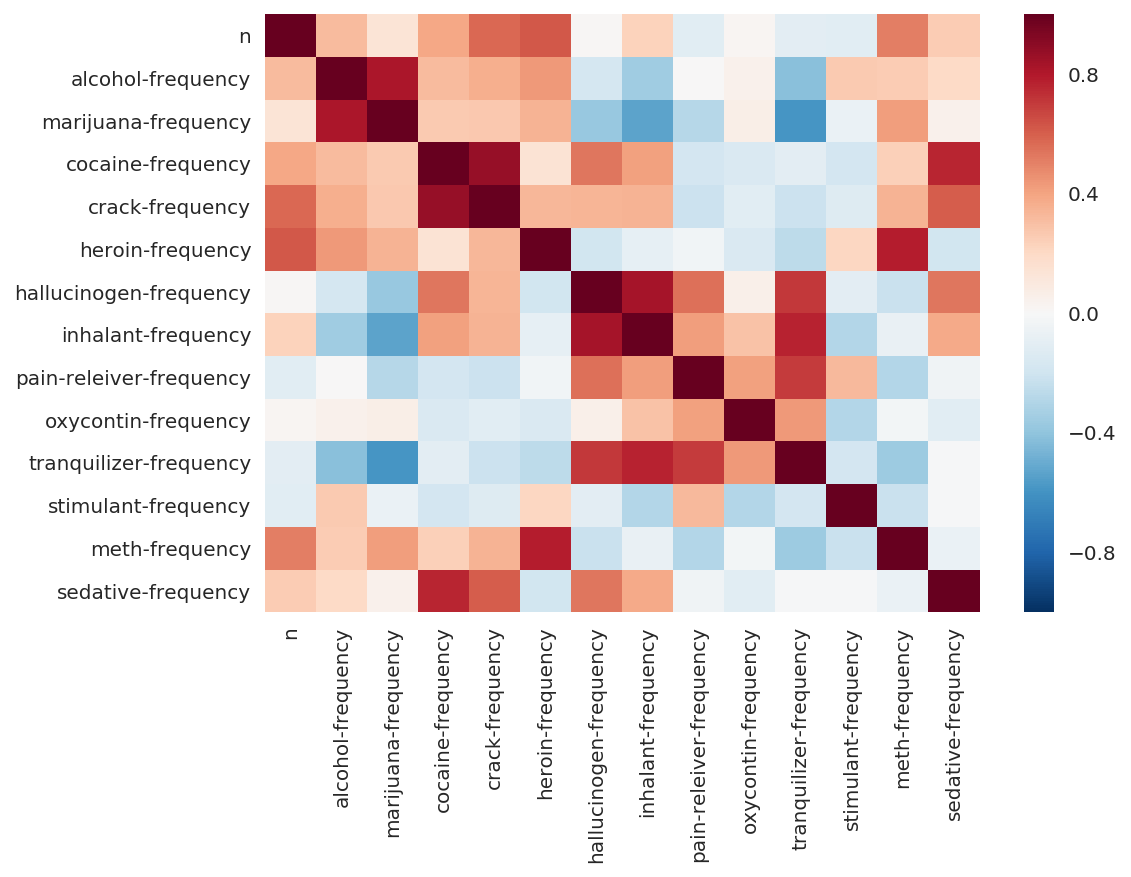

In [53]:
drug_f_corr = drug_f.corr()
sns.heatmap(drug_f_corr)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

# Question and deliverables**
What is the most popular drug by age group?
Are there trends of drug usage by age? aka do some drugs lose popularity as people age vs others?

will show a graph overlayed with drug use vs age colored based on drug type. probably a line plot but maybe a scatter

will certainly need to convert age into a numeric.. whats the best way to do this? take the average age of the subgroup and label it that? that loses the standard step size of a year on the x axis. i think it would be better to duplicate the values of the range for each age in the range. this means there will be duplicate values in the age ranges but its easier than interpolating different values on each side of the age range

# [] Hypothesis:
## Younger people do more drugs & Drugs in groups have similarities
### I'd like to graph the useage of all drugs and subsets of drugs like painkillers, uppers, downers together and see how useage and frequency is affected by age. 
## 1. I need to get the age brackets into a numerical format to graph
## 2. Duplicate the values for for each age in the entire range to create a consistent x axis
## 3. Create subset lists drug_use, drug_freq to further refine graphs
## 4. Create hard_use, hard_freq removing alc and mj from the lists

# [] Age range has '65+' and '22-24' as ranges, split values and add appropriate columns to dataframe

In [54]:
#create an age numeric df so we don't overwrite anything
drug_age = drug.copy()

#loop through each age, copy the row and put the integer value in there
for i in list(drug['age']):
    if '-' in i:
        low,hi = i.split('-')
        low = int(low)
        hi = int(hi)
        #print(type(low))
        #print(i)
        for j in range(low,hi+1):
            ndf = drug_age[drug_age['age'] == i].copy()
            ndf['age'] = j
            frame = [drug_age,ndf]
            drug_age = pd.concat(frame)
    if '+' in i:
        #print(i)
        low,hi = i.split('+')
        low = int(low)
        hi = 85
        for j in range(low,hi+1):
            ndf = drug_age[drug_age['age'] == i].copy()
            ndf['age'] = j
            frame = [drug_age,ndf]
            drug_age = pd.concat(frame)

#reset index so the copies wont be deleted when deleting the originals
drug_age = drug_age.reset_index()    
for i in list(drug_age['age']):
    #print(i)
    if '-' in str(i):
        drug_age = drug_age.drop(drug_age[drug_age['age'] == i].index)
    if '+' in str(i):
        drug_age = drug_age.drop(drug_age[drug_age['age'] == i].index)

#finnnnaaaaaally change age to numeric
drug_age['age'] = pd.to_numeric(drug_age['age'])

#sort after changing to numeric because it sorts strings and numerics wrong
drug_age = drug_age.sort_values('age')

#reset index again because now some are removed and delete the fake index rows
drug_age = drug_age.reset_index()   
del drug_age['index']
del drug_age['level_0']

## Thought perhaps the median value would produce a better looking graph, but ended up not.

In [55]:
#create an age numeric col
drug_m_age = drug.copy()

#loop through each age, copy the row and put the integer value in there
for i in list(drug['age']):
    if '-' in i:
        low,hi = i.split('-')
        low = int(low)
        hi = int(hi)
        #print(type(low))
        #print(i)
        mid = float((low+hi)/2.0)
        #for j in range(low,hi+1):
        ndf = drug_m_age[drug_m_age['age'] == i].copy()
        ndf['age'] = mid
        frame = [drug_m_age,ndf]
        drug_m_age = pd.concat(frame)
    if '+' in i:
        #print(i)
        low,hi = i.split('+')
        low = int(low)
        hi = 85
        mid = int((low+hi)/2)
        ndf = drug_m_age[drug_m_age['age'] == i].copy()
        ndf['age'] = mid
        frame = [drug_m_age,ndf]
        drug_m_age = pd.concat(frame)

#reset index so the copies wont be deleted when deleting the originals
drug_m_age = drug_m_age.reset_index()    
for i in list(drug_m_age['age']):
    #print(i)
    if '-' in str(i):
        drug_m_age = drug_m_age.drop(drug_m_age[drug_m_age['age'] == i].index)
    if '+' in str(i):
        drug_m_age = drug_m_age.drop(drug_m_age[drug_m_age['age'] == i].index)

#finnnnaaaaaally change age to numeric
drug_m_age['age'] = pd.to_numeric(drug_m_age['age'])

#sort after changing to numeric because it sorts strings and numerics wrong
drug_m_age = drug_m_age.sort_values('age')

#reset index again because now some are removed and delete the fake index rows
drug_m_age = drug_m_age.reset_index()   
del drug_m_age['index']
del drug_m_age['level_0']

## The second graph infers alot about the data I think its probably better to run with the first one. 
## Also, I found it was easier to differentiate the other data in the first type

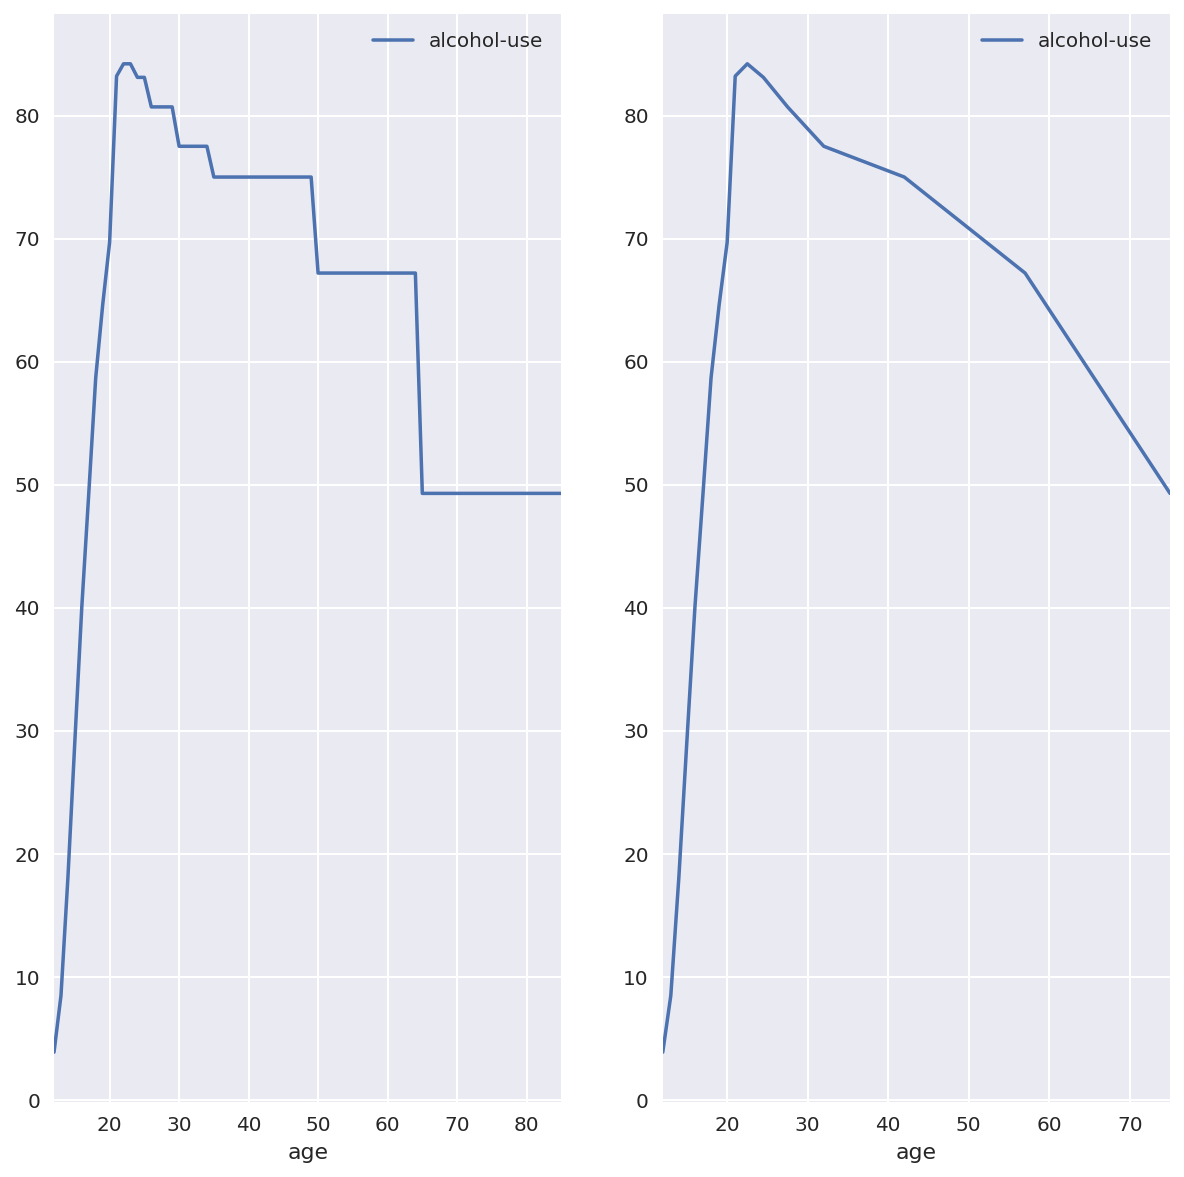

In [56]:
#using the mean point in the ranges vs plugging in all cols for it
fig, axs = plt.subplots(1,2,figsize=(10,10))
drug_age.plot(x='age',y='alcohol-use',ax=axs[0])
drug_m_age.plot(x='age',y='alcohol-use',ax=axs[1])

# [] Also tried smoothing the stepped dataset
## IMO modified the data too much

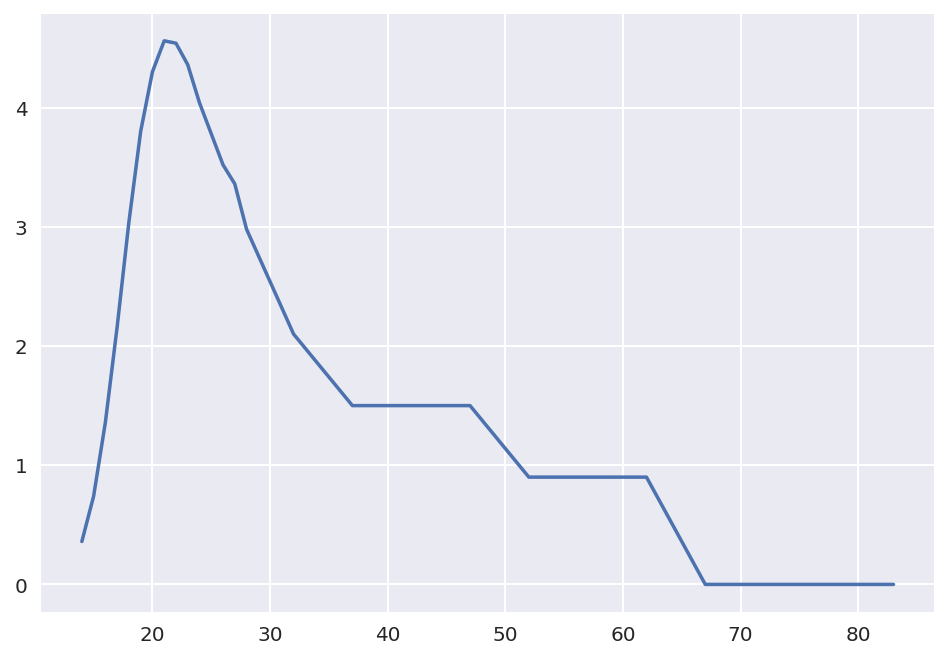

In [57]:
import matplotlib.pyplot as plt
plt.plot(drug_age['age'],drug_age['cocaine-use'].rolling(window=5,center=True).mean())

# [] Side note lets take a look at the top 5 drugs per age group

In [58]:
#create a drug_use df
drug_use_a = pd.DataFrame()
drug_use_b = pd.DataFrame()

cols = drug_age.columns
colsb = drug.columns

drug_use_a['age'] = drug_age['age']
drug_use_b['age'] = drug['age']

for col in cols:
    if 'use' in col:
        #print(col)
        drug_use_a[col] = drug_age[col]

for col in colsb:
    if 'use' in col:
        #print(col)
        drug_use_b[col] = drug[col]

#del drug_use['n']
drug_use_a.tail()
#drug_use_b.tail()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
69,81,49.3,1.2,0.0,0.0,0.0,0.1,0.0,0.6,0.0,0.2,0.0,0.0,0.0
70,82,49.3,1.2,0.0,0.0,0.0,0.1,0.0,0.6,0.0,0.2,0.0,0.0,0.0
71,83,49.3,1.2,0.0,0.0,0.0,0.1,0.0,0.6,0.0,0.2,0.0,0.0,0.0
72,84,49.3,1.2,0.0,0.0,0.0,0.1,0.0,0.6,0.0,0.2,0.0,0.0,0.0
73,85,49.3,1.2,0.0,0.0,0.0,0.1,0.0,0.6,0.0,0.2,0.0,0.0,0.0


In [59]:
drug_use_a = drug_use_a.set_index('age').T
drug_use_a.head()

age,12,13,14,15,16,17,18,19,20,21,...,76,77,78,79,80,81,82,83,84,85
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,...,49.3,49.3,49.3,49.3,49.3,49.3,49.3,49.3,49.3,49.3
marijuana-use,1.1,3.4,8.7,14.5,22.5,28.0,33.7,33.4,34.0,33.0,...,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2
cocaine-use,0.1,0.1,0.1,0.5,1.0,2.0,3.2,4.1,4.9,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
crack-use,0.0,0.0,0.0,0.1,0.0,0.1,0.4,0.5,0.6,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
heroin-use,0.1,0.0,0.1,0.2,0.1,0.1,0.4,0.5,0.9,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
drug_use_b = drug_use_b.set_index('age').T
drug_use_b

age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75.0,67.2,49.3
marijuana-use,1.1,3.4,8.7,14.5,22.5,28.0,33.7,33.4,34.0,33.0,28.4,24.9,20.8,16.4,10.4,7.3,1.2
cocaine-use,0.1,0.1,0.1,0.5,1.0,2.0,3.2,4.1,4.9,4.8,4.5,4.0,3.2,2.1,1.5,0.9,0.0
crack-use,0.0,0.0,0.0,0.1,0.0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0.0
heroin-use,0.1,0.0,0.1,0.2,0.1,0.1,0.4,0.5,0.9,0.6,1.1,0.7,0.6,0.4,0.1,0.1,0.0
hallucinogen-use,0.2,0.6,1.6,2.1,3.4,4.8,7.0,8.6,7.4,6.3,5.2,4.5,3.2,1.8,0.6,0.3,0.1
inhalant-use,1.6,2.5,2.6,2.5,3.0,2.0,1.8,1.4,1.5,1.4,1.0,0.8,0.6,0.4,0.3,0.2,0.0
pain-releiver-use,2.0,2.4,3.9,5.5,6.2,8.5,9.2,9.4,10.0,9.0,10.0,9.0,8.3,5.9,4.2,2.5,0.6
oxycontin-use,0.1,0.1,0.4,0.8,1.1,1.4,1.7,1.5,1.7,1.3,1.7,1.3,1.2,0.9,0.3,0.4,0.0
tranquilizer-use,0.2,0.3,0.9,2.0,2.4,3.5,4.9,4.2,5.4,3.9,4.4,4.3,4.2,3.6,1.9,1.4,0.2


In [ ]:
# #make a new dataframe a set the columns to the age groups
# drug_use_b = drug_use_b.set_index('age').T

# #create a dictionary and take the top5 most popular drugs per age group
# top5b = {}
# for i in drug_use_b.columns:
#     top5b[i] = drug_use_b[i].sort_values(ascending=False).head()
    
# #fill the NaNs so its easier to view
# top5b = pd.DataFrame(top5b)
# top5b.fillna('',inplace=True)
# top5b.head()

In [92]:
#find the top 5 drugs per age group
top5b = {}
top5  = {}
for i in drug_use_a.columns:
    #print(i)
    top5[i] = drug_use_a[i].sort_values(ascending=False).head()

for i in drug_use_b.columns:
    #print(i)
    top5b[i] = drug_use_b[i].sort_values(ascending=False).head()
    
#make a dataframe, fill the NaNs
top5 = pd.DataFrame(top5)
top5.fillna('',inplace=True)

top5b = pd.DataFrame(top5b)
top5b.fillna('',inplace=True)

top5b

,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75,67.2,49.3
cocaine-use,,,,,,,,,,4.8,4.5,,,2.1,1.5,0.9,
hallucinogen-use,,0.6,1.6,2.1,3.4,4.8,7,8.6,7.4,6.3,5.2,4.5,3.2,,,,0.1
inhalant-use,1.6,2.5,2.6,2.5,3,,,,,,,,,,,,
marijuana-use,1.1,3.4,8.7,14.5,22.5,28,33.7,33.4,34,33,28.4,24.9,20.8,16.4,10.4,7.3,1.2
pain-releiver-use,2,2.4,3.9,5.5,6.2,8.5,9.2,9.4,10,9,10,9,8.3,5.9,4.2,2.5,0.6
sedative-use,0.2,,,,,,,,,,,,,,,,
tranquilizer-use,,,,,,3.5,4.9,4.2,5.4,,,4.3,4.2,3.6,1.9,1.4,0.2


In [86]:
for i in top5.columns:
    top5[i] = pd.to_numeric(top5[i])
    
for i in top5b.columns:
    top5b[i] = pd.to_numeric(top5b[i],errors=coerce)

# [] Take a look at the top 5 drug uses:
## Interesting to see of the top 5 drugs over all age groups only 8 drugs make the list.
## Age group 21 has the highest % of drug users over all ages and all drugs, it is closely followed by 20 and 22-23.
## I take the cumulative percent users above 100 to mean that there is overlap in user of those age groups. This would mean between ages 17-34 there is a certainty that some of the population uses multiple drugs

In [88]:
top5b.fillna('')

,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75,67.2,49.3
cocaine-use,,,,,,,,,,4.8,4.5,,,2.1,1.5,0.9,
hallucinogen-use,,0.6,1.6,2.1,3.4,4.8,7,8.6,7.4,6.3,5.2,4.5,3.2,,,,0.1
inhalant-use,1.6,2.5,2.6,2.5,3,,,,,,,,,,,,
marijuana-use,1.1,3.4,8.7,14.5,22.5,28,33.7,33.4,34,33,28.4,24.9,20.8,16.4,10.4,7.3,1.2
pain-releiver-use,2,2.4,3.9,5.5,6.2,8.5,9.2,9.4,10,9,10,9,8.3,5.9,4.2,2.5,0.6
sedative-use,0.2,,,,,,,,,,,,,,,,
tranquilizer-use,,,,,,3.5,4.9,4.2,5.4,,,4.3,4.2,3.6,1.9,1.4,0.2


In [79]:
drug_use_b.sum()

age                  1213141516171819202122-2324-2526-2930-3435-495...
alcohol-use                                                      942.3
marijuana-use                                                    321.7
cocaine-use                                                         37
crack-use                                                            5
heroin-use                                                           6
hallucinogen-use                                                  57.7
inhalant-use                                                      23.6
pain-releiver-use                                                106.6
oxycontin-use                                                     15.9
tranquilizer-use                                                  47.7
stimulant-use                                                     32.6
meth-use                                                           6.5
sedative-use                                                       4.8
dtype:

In [66]:
# g = sns.boxplot(drug_use_a.T)
# g.fig.get_axes()[0].set_yscale('log')
# plt.show()

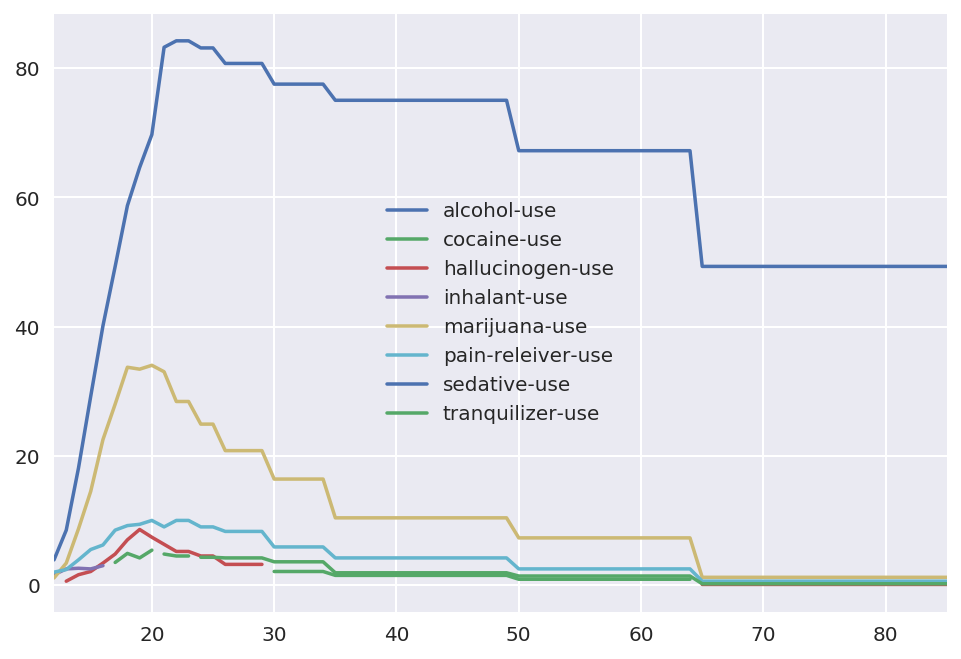

In [67]:
top5.T.plot()

# [] Create the sublists

In [68]:
cols = drug_age.columns

#group drugs
use_list = []
for col in cols:
    if 'use' in col:
        use_list.append(col)
    
freq_list = []
for col in cols:
    if 'frequency' in col:
        freq_list.append(col)

hard_use = []
for col in use_list:
    hard_use.append(col)
    
hard_use.remove('alcohol-use')
hard_use.remove('marijuana-use')

hard_freq = []
for col in freq_list:
    hard_freq.append(col)
            
hard_freq.remove('alcohol-frequency')
hard_freq.remove('marijuana-frequency')        
        
pain_use = []
for col in use_list:
    if 'pain' in col:
        pain_use.append(col)
    if 'oxy' in col:
        pain_use.append(col)
    if 'heroin' in col:
        pain_use.append(col)

pain_freq = []
for col in freq_list:
    if 'pain' in col:
        pain_freq.append(col)
    if 'oxy' in col:
        pain_freq.append(col)
    if 'heroin' in col:
        pain_freq.append(col)
        
uppers_use = []
for col in use_list:
    if 'crack' in col:
        uppers_use.append(col)
    if 'cocaine' in col:
        uppers_use.append(col)
    if 'stim' in col:
        uppers_use.append(col)
    if 'meth' in col:
        uppers_use.append(col)
        
uppers_freq = []
for col in freq_list:
    if 'crack' in col:
        uppers_freq.append(col)
    if 'cocaine' in col:
        uppers_freq.append(col)
    if 'stim' in col:
        uppers_freq.append(col)
    if 'meth' in col:
        uppers_freq.append(col)
        
downers_use = []
for col in use_list:
    if 'tranq' in col:
        downers_use.append(col)
    if 'sedat' in col:
        downers_use.append(col)
    if 'alco' in col:
        downers_use.append(col)
        
downers_freq = []
for col in freq_list:
    if 'tranq' in col:
        downers_freq.append(col)
    if 'sedat' in col:
        downers_freq.append(col)
    if 'alco' in col:
        downers_freq.append(col)

# [] Check that its working.
## Now try subsetting the Drug_age dataframe and plot only the subset

In [69]:
hard_use

['cocaine-use',
 'crack-use',
 'heroin-use',
 'hallucinogen-use',
 'inhalant-use',
 'pain-releiver-use',
 'oxycontin-use',
 'tranquilizer-use',
 'stimulant-use',
 'meth-use',
 'sedative-use']

# [] No surprise:
## Alcohol is popular, 
## Marijuanna is the 2nd most popular
## I'm going to assume going forward that both are not 'hard drugs'

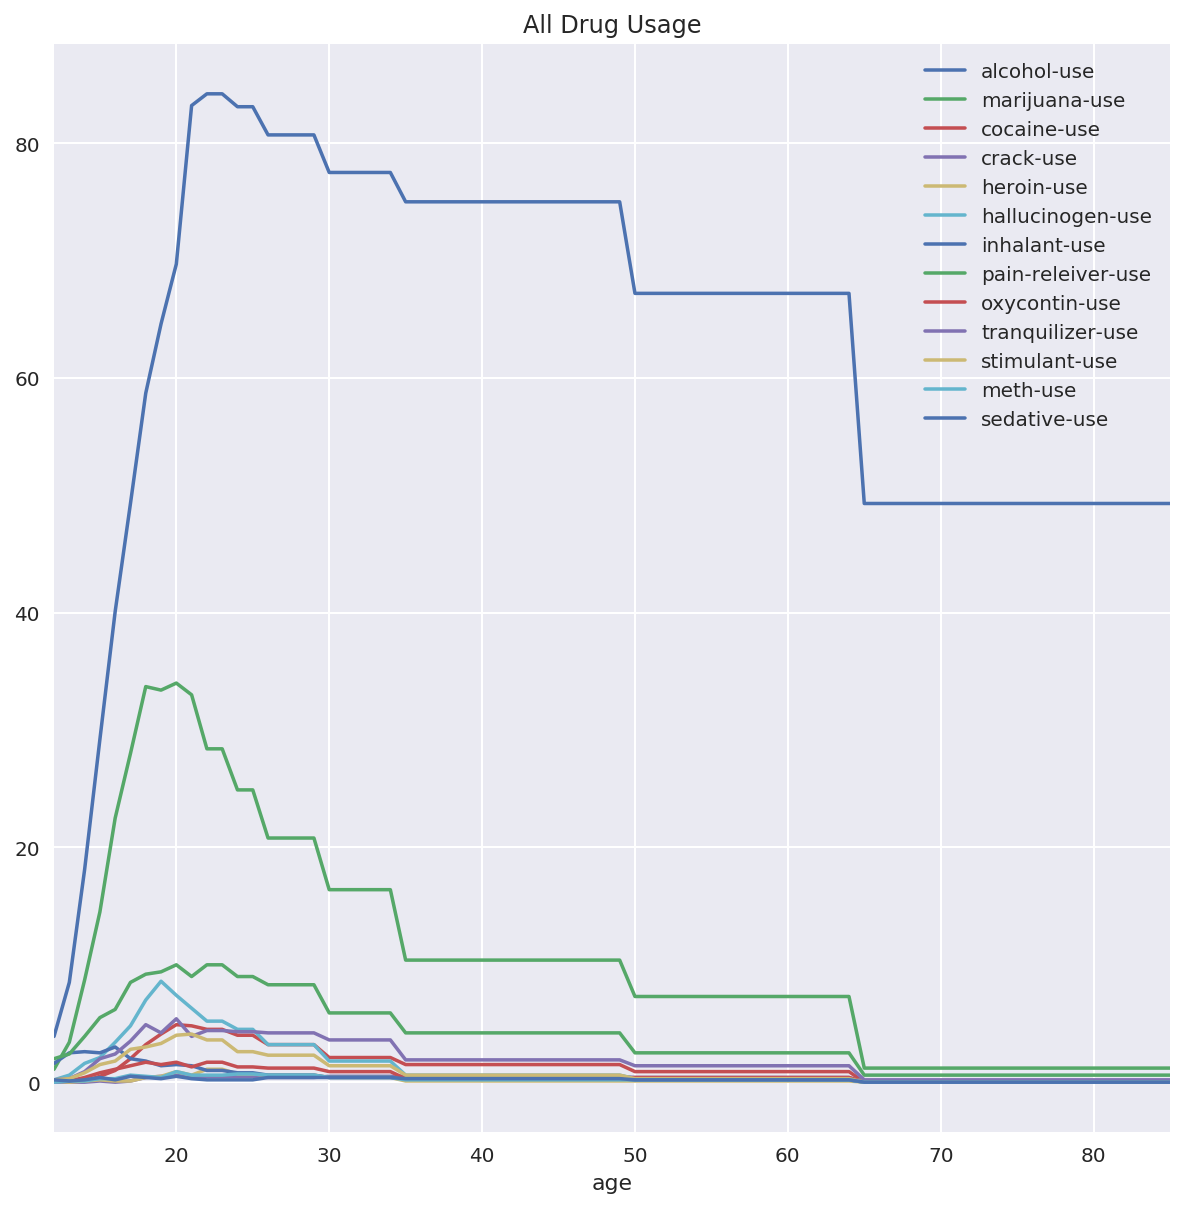

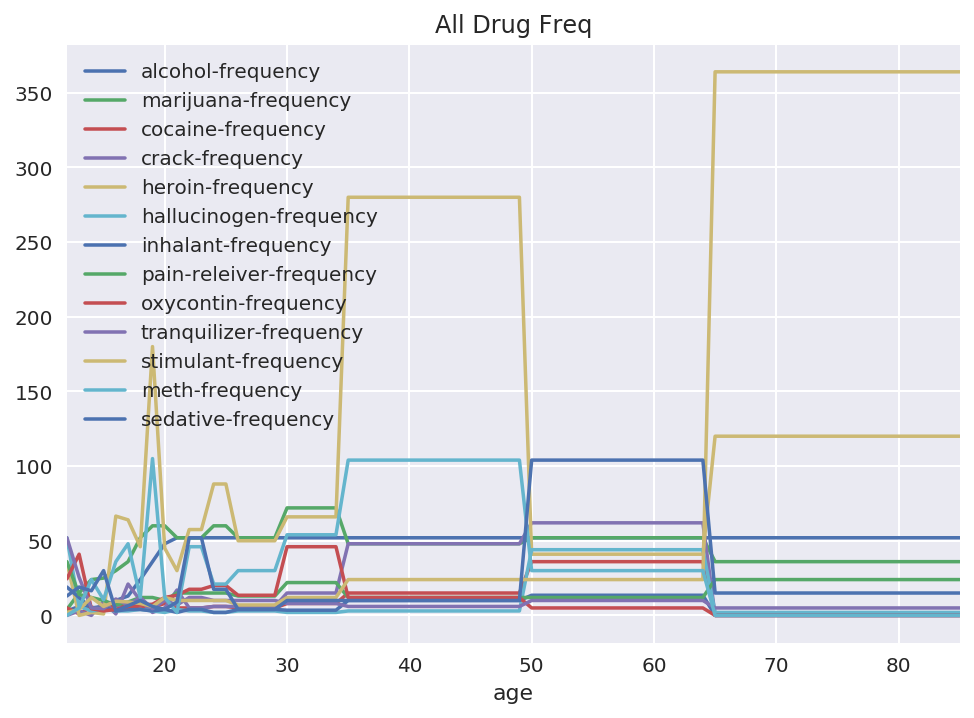

In [70]:
drug_age.plot(x='age',y=use_list,title='All Drug Usage',figsize=(10,10))
#drug_m_age.plot(x='age',y=use_list)

drug_age.plot(x='age',y=freq_list,title='All Drug Freq')
#drug_m_age.plot(x='age',y=freq_list)

In [71]:
# #points back to use-list so it getting messed up too
# hard_use_list = use_list
# hard_use_list.remove('marijuana-use')
# hard_use_list.remove('alcohol-use')

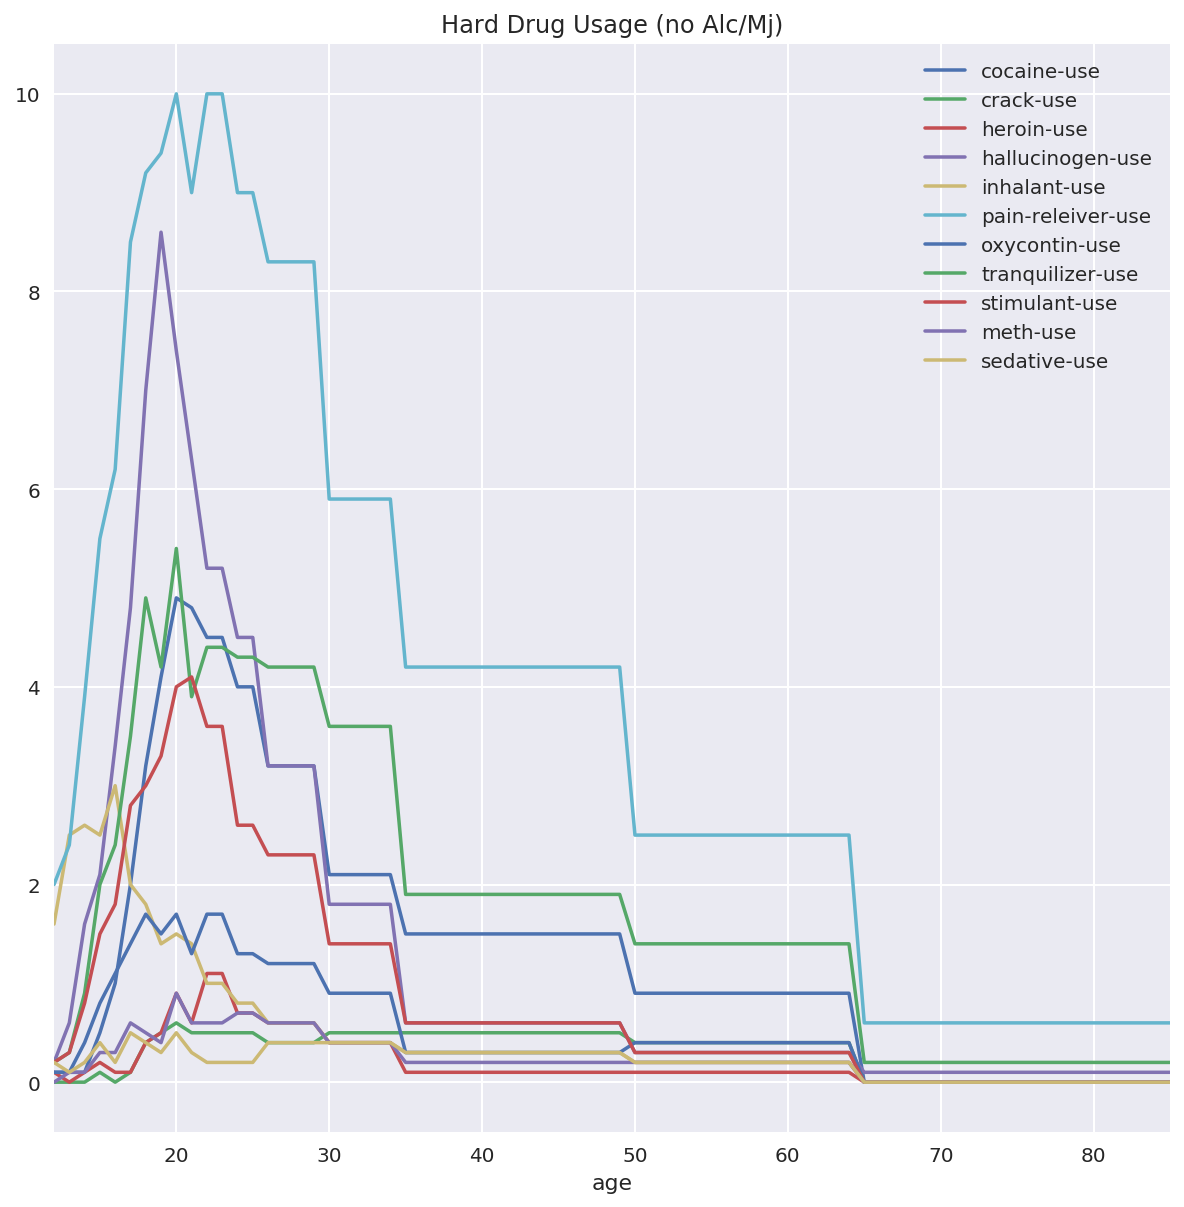

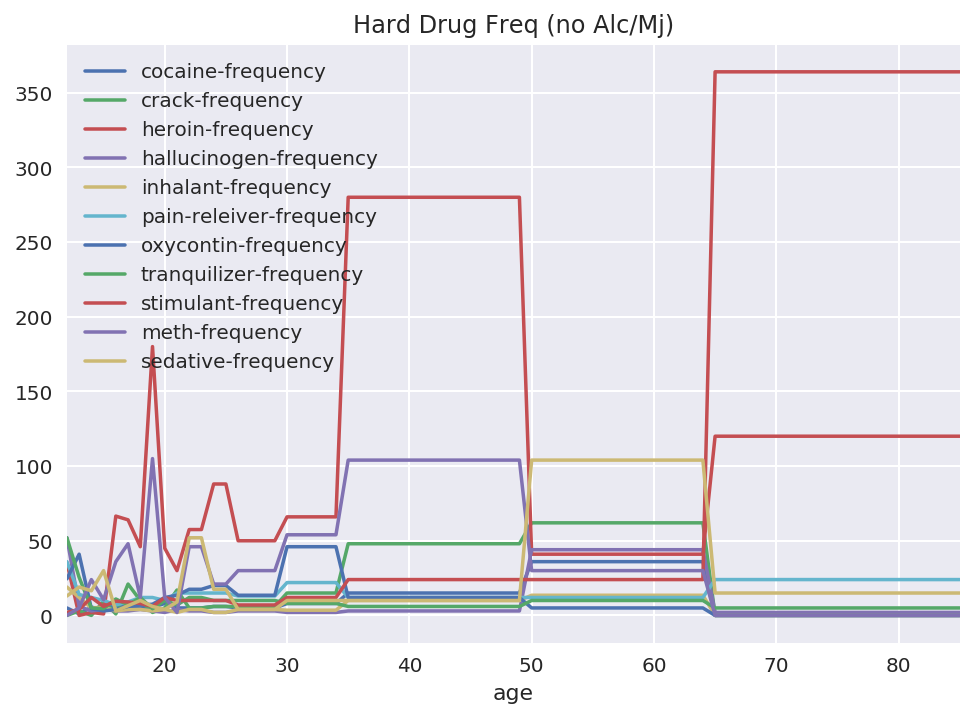

In [74]:
#hallucinogens sharply peek in the college years
drug_age.plot(x='age',y=hard_use,title='Hard Drug Usage (no Alc/Mj)',figsize=(10,10))
drug_age.plot(x='age',y=hard_freq,title='Hard Drug Freq (no Alc/Mj)')
#ay.set_ylim(0,110)

# [] Uppers:
## Cocaine is overtakes 'stimulants' by age ~17. I wonder what stimulants are meant by this.
## Interesting to see crack overtakes meth in popularity ~age 30

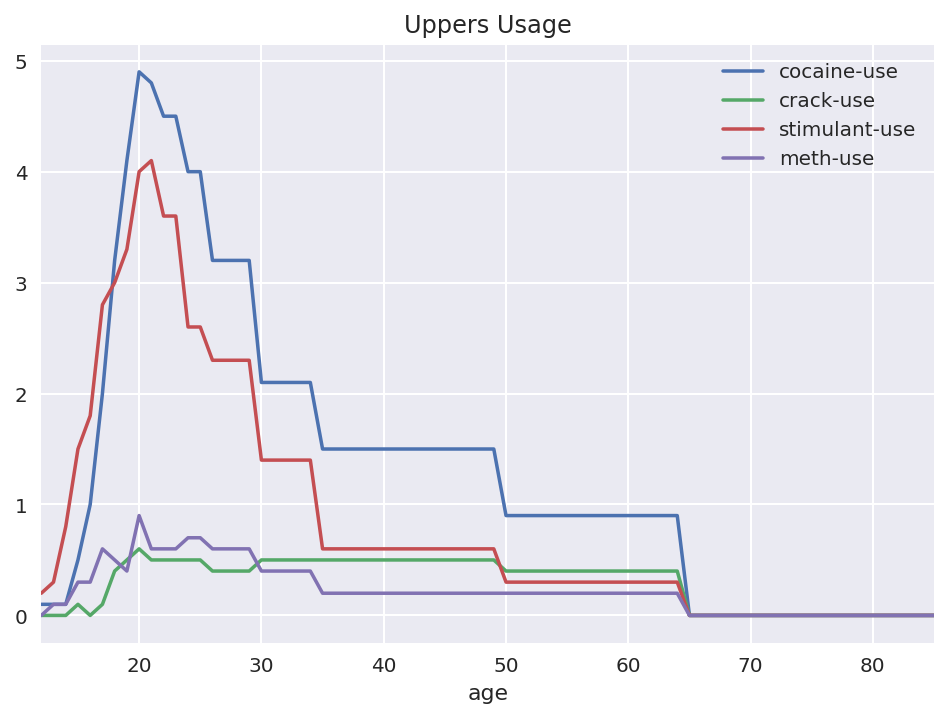

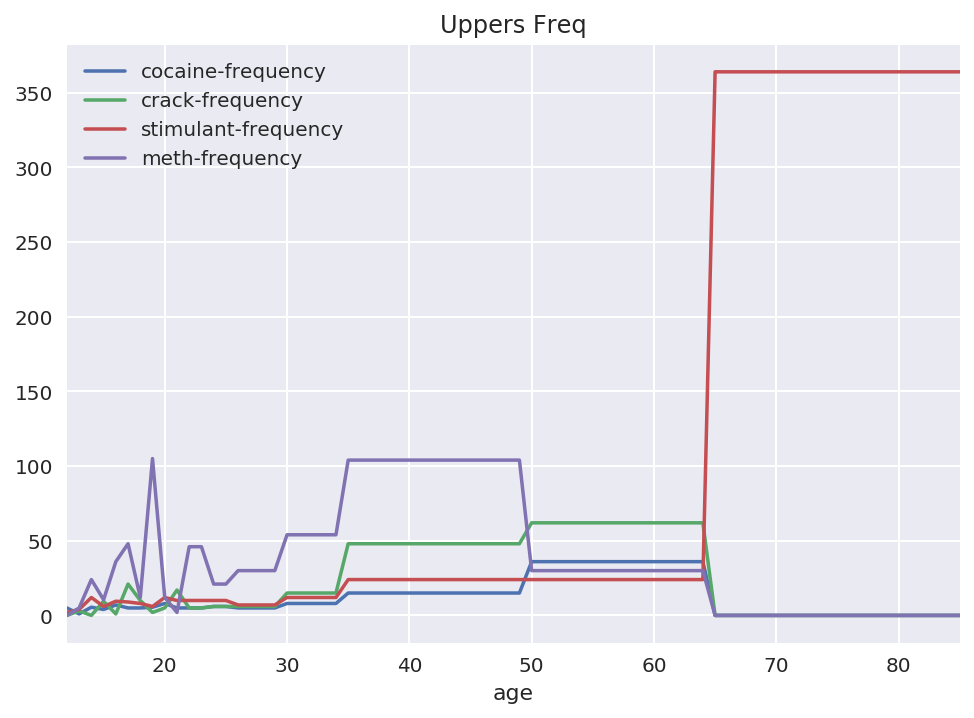

In [73]:
drug_age.plot(x='age',y=uppers_use,title='Uppers Usage')
drug_age.plot(x='age',y=uppers_freq,title='Uppers Freq')

In [68]:
#sns.boxplot(drug_age[use_list])
#sns.boxplot(drug_age[freq_list])

# [] Painkillers:
## There has been an increase in prescription drug use of painkillers in older adults due to the higher rate of prescribed painkillers by doctors. 
## Oxycontin is a rare case of showing an uptick in useage in a drug later in life
## If these users get addicted, it is very difficult to keep up with the expensive habit so they often steer towards the cheapest high, heroin

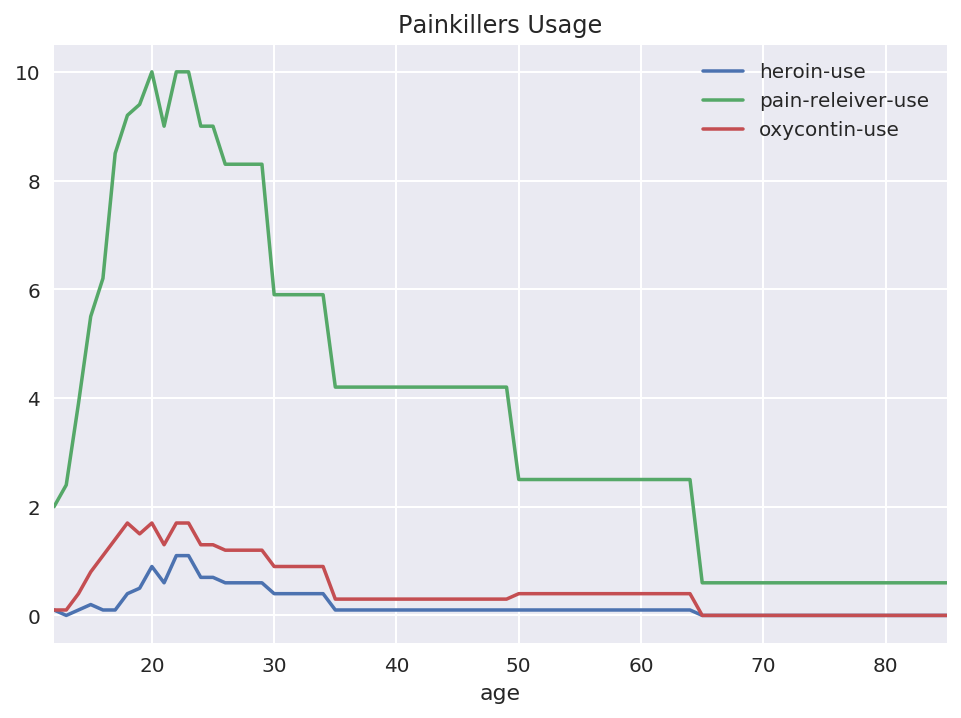

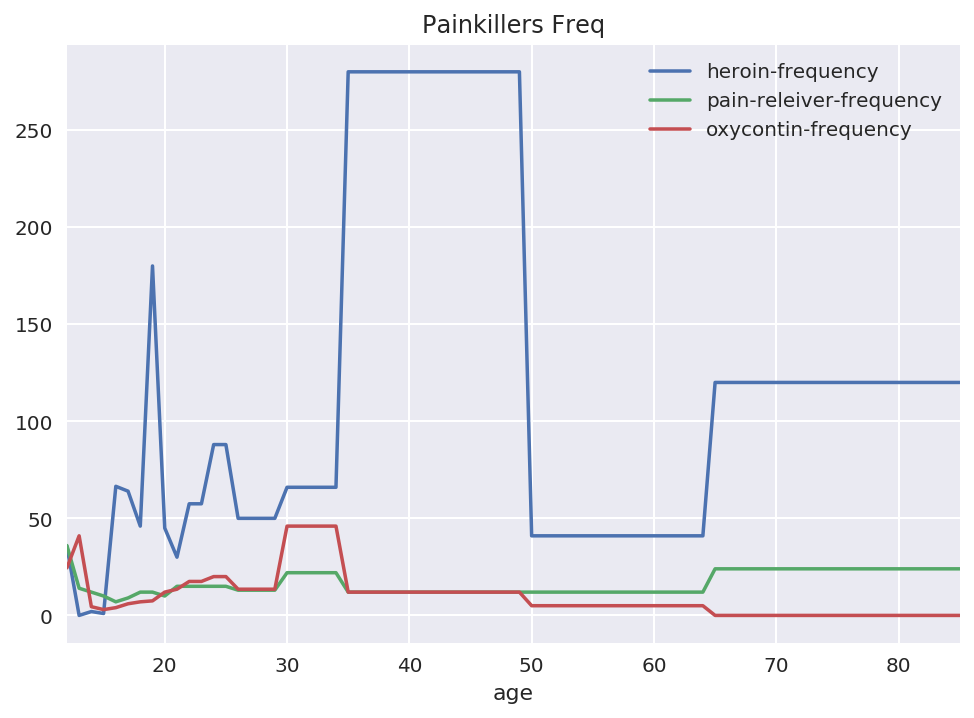

In [69]:
drug_age.plot(x='age',y=pain_use,title='Painkillers Usage')
drug_age.plot(x='age',y=pain_freq,title='Painkillers Freq')

# [] Downers
## Alcohol is by far the most popular drug, this is not unexpected since it was most likely the only legal drug when this study was done
## The huge increase in frequency of use in sedatives in the 50-65 age group is difficult to explain

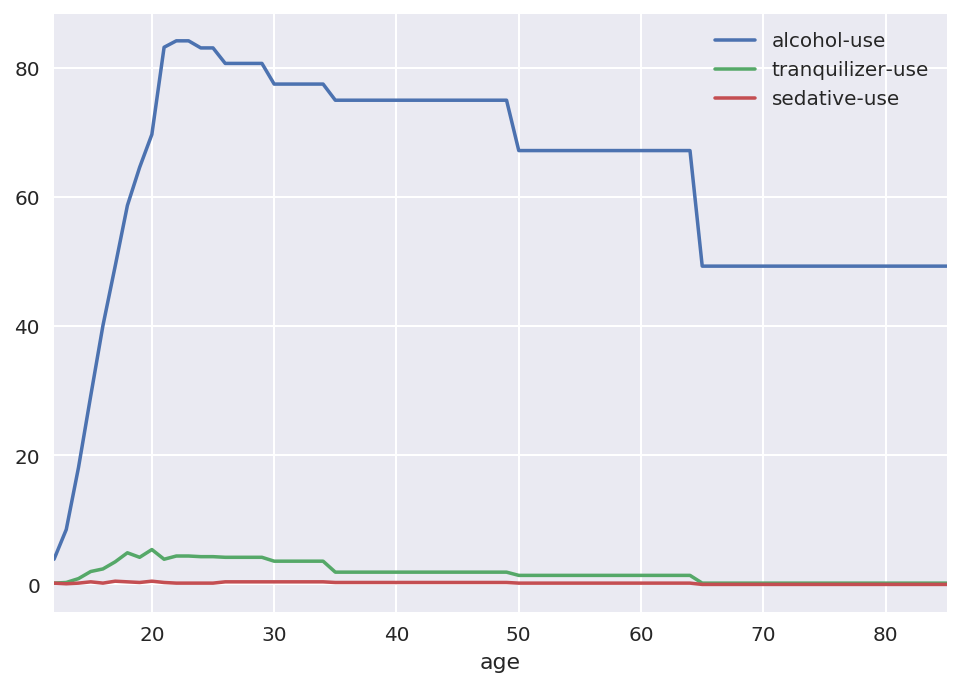

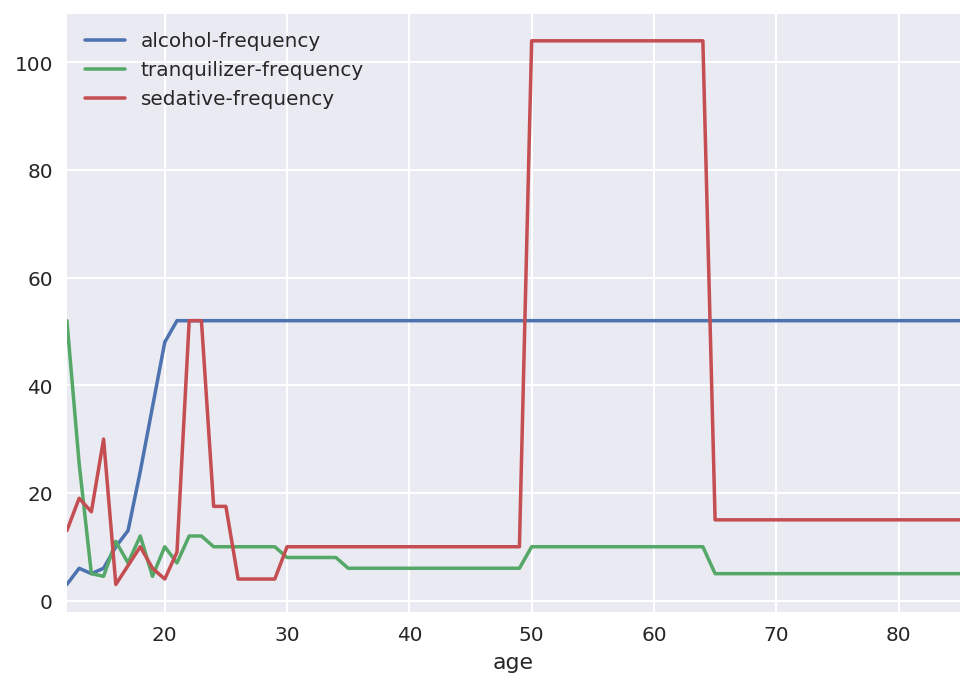

In [70]:
drug_age.plot(x='age',y=downers_use)
drug_age.plot(x='age',y=downers_freq)

*

*Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [74]:
#no outliers higher than 3 stds away from the mean.. odd

In [75]:
sat_out = sat.copy()
del sat_out['Rate']
del sat_out['Region']
del sat_out['R_num']
del sat_out['Verbal/Math Diff']

In [76]:
sat_out.head()

,State,Verbal,Math
0,CT,509,510
1,NJ,499,513
2,MA,511,515
3,NY,495,505
4,NH,520,516


In [77]:
#sat_out[(np.abs(stats.zscore(sat_out[['Math','Verbal']])) < 3).all(axis=1)].count()

sat_out[(np.abs(sat_out['Verbal']-np.mean(sat_out['Verbal']))>=(3*np.std(sat_out['Verbal'])))]
sat_out[(np.abs(sat_out['Math']-np.mean(sat_out['Math']))>=(3*np.std(sat_out['Math'])))]

,State,Verbal,Math


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [78]:
#the spearman correlation matrix 
#seems to find more relationship between the two than the regular pearson corr does
#I believe it just checks whether arrays increase each step as opposed to the amount of increase in the pearson

sat_corr = sat[['Math','Verbal']].corr()
sat_scorr = sat[['Math','Verbal']].corr(method='spearman')

print(sat_corr)
print(sat_scorr)




            Math    Verbal
Math    1.000000  0.899871
Verbal  0.899871  1.000000
            Math    Verbal
Math    1.000000  0.905205
Verbal  0.905205  1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [79]:
#cali index
sat[sat['State'] == 'CA'].index[0]

23

In [80]:
#although california's rate is 51st, its percentile when compared to the rest of the states is the 57th
np.percentile(sat['Rate'],50)
CA_rate = sat.ix[sat[sat['State'] == 'CA'].index[0],'Rate']
stats.percentileofscore(sat['Rate'],CA_rate)

56.730769230769226

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

TypeError: percentileofscore() takes at least 2 arguments (1 given)

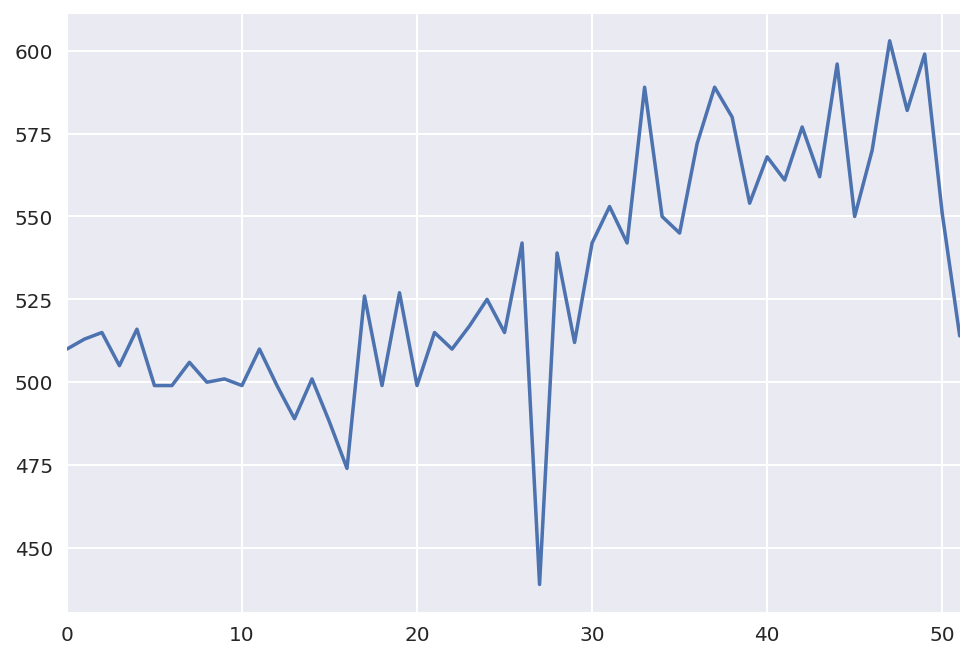

In [81]:
#1 you could decide to remove everything outside of the 95th percentile without calculating std

#2 don't understand how to apply this..
sat['Math'].plot()
#sat['Mathp'] = sat['Math'].apply(stats.percentileofscore)